<a href="https://colab.research.google.com/github/Sujal-Patnaik/Task1/blob/main/MLT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q langgraph langchain langchain-google-genai google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 9.3 MB/s eta 0:00:00


In [2]:
import os
from getpass import getpass
os.environ["GOOGLE_API_KEY"] = getpass("🔐 Enter your Google API Key: ")

🔐 Enter your Google API Key: ··········


In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    temperature=0.3
)


In [4]:
from langgraph.graph import StateGraph, END
from langchain_core.runnables import RunnableLambda
from typing import TypedDict
from langchain_core.tools import tool

class GraphState(TypedDict):
    input : str
    output : str

@tool
def calculator_tool(expression: str) -> str:
    """Evaluate a basic arithmetic expression like 2+3 or (4*5)-2."""
    try:
        allowed_chars = "1234567890*+/-() "
        if all(ch in allowed_chars for ch in expression):
            expression = expression.replace(" ", "")
            return f"The value of the expression is {eval(expression)}"
        else:
            return llm.invoke(expression).content
    except Exception as e:
        return f"The error is: {e}"


def chatbot_node(state: GraphState) -> GraphState:
  user_input = state["input"]
  if any(operator in user_input for operator in "+-/*"):
    state["output"] = state["output"] + calculator_tool(user_input)
  else:
    state["output"] = state["output"] + llm.invoke(user_input).content
  return state

graph = StateGraph(GraphState)
graph.add_node("chatbot", RunnableLambda(chatbot_node))
graph.set_entry_point("chatbot")
graph.set_finish_point("chatbot")

executable_graph = graph.compile()



In [5]:
output = executable_graph.invoke({"input": "What is 4 * (3 + 2)?","output":""})
print(output["output"])


<ipython-input-4-a5a2ba8dbb81>:27: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  state["output"] = state["output"] + calculator_tool(user_input)


Following the order of operations (PEMDAS/BODMAS), we first solve the parentheses:

3 + 2 = 5

Then we multiply:

4 * 5 = 20

So the answer is $\boxed{20}$


In [6]:
output = executable_graph.invoke({"input": "4*(3+2)","output":""})
print(output["output"])

The value of the expression is 20


In [7]:
output = executable_graph.invoke({"input": "4  *( 3+  2)","output":""})
print(output["output"])

The value of the expression is 20


In [8]:
output = executable_graph.invoke({"input": "*8  +9","output":""})
print(output["output"])

The error is: invalid syntax (<string>, line 1)


In [9]:
output = executable_graph.invoke({"input": " 5/0 + 2","output":""})
print(output["output"])

The error is: division by zero


In [10]:
output = executable_graph.invoke({"input": "8    + 9**2","output":""})
print(output["output"])

The value of the expression is 89


In [11]:
output = executable_graph.invoke({"input": "I want the value of eight squared","output":""})
print(output["output"])

Eight squared (8²) is 64.


In [12]:
output = executable_graph.invoke({"input": "what is the value of 2*(90)*4","output":""})
print(output["output"])

2 * 90 * 4 = 180 * 4 = 720


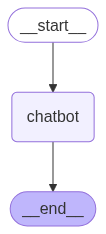

In [13]:
from IPython.display import Image, display
display(Image(executable_graph.get_graph().draw_mermaid_png()))

In [14]:
!pip install spacy

In [16]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 3.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [15]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 93.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [17]:
from langchain_core.tools import tool
import spacy

# Load spaCy model once globally for efficiency
nlp = spacy.load("en_core_web_lg")

# Ensure llm is defined (e.g., from ChatGoogleGenerativeAI or ChatOpenAI)
# llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")  # example setup

@tool("fashion_tool", parse_docstring=True)
def fashion_tool(input_text: str) -> str:
    """
    Provides examples of trending clothes based on a location mentioned in the input.

    Args:
        input_text: A user query mentioning a place or location.

    Returns:
        A list of trending fashion suggestions relevant to the location.
    """
    try:
        doc = nlp(input_text)
        for ent in doc.ents:
            if ent.label_ == "GPE":
                return llm.invoke(f"Give 4-5 examples of trending clothes in {ent.text}. Please dont give very descriptive answers").content
        return "No location found in input. Please specify a city or country."
    except Exception as e:
        return f"⚠️ Error in fashion tool: {e}"


In [18]:
print(fashion_tool("What is trending in Bhubaneswar?"))

1. Kurtis and ethnic wear
2. Indo-western fusion outfits
3. Comfortable cotton clothing
4.  Lightweight sarees
5.  Denim jackets (for layering)


In [19]:
print(fashion_tool("What is trending in America?"))

1.  Cargo pants
2.  Y2K fashion
3.  Oversized blazers
4.  Corset tops
5.  Slip dresses


In [20]:
print(fashion_tool("What is trending in UK?"))

1.  Cargo pants
2.  Oversized blazers
3.  Corset tops
4.  Knitwear dresses
5.  Chunky boots


In [21]:
print(fashion_tool("What is trending in London?"))

1.  Reworked vintage denim
2.  Bold, oversized outerwear
3.  Sustainable and ethically sourced pieces
4.  Statement footwear (chunky boots or platform shoes)
5.  Sleek, minimalist tailoring


In [22]:
print(fashion_tool("What is trending in New York?"))

1.  Elevated athleisure
2.  Statement outerwear
3.  Bold colors/prints
4.  Vintage/reworked denim
5.  Sleek minimalist dresses


In [23]:
print(fashion_tool("What kind of clothes are famous in Tokyo"))

1.  Deconstructed tailoring
2.  Neo-vintage sportswear
3.  Harajuku street style reinterpretations
4.  Elevated basics with unique details
5.  Bold graphic tees/sweatshirts


In [24]:
print(fashion_tool("What is trending in China?"))

1.  Hanfu (traditional Chinese clothing)
2.  Oversized streetwear
3.  Athleisure
4.  Minimalist styles
5.  Vintage/retro pieces


In [25]:
print(fashion_tool("what type of fashion is generally preferred by people of Australia?"))

1.  Flowy maxi dresses
2.  Wide-leg jeans
3.  Knitwear (cardigans, jumpers)
4.  Statement jewellery
5.  Slip dresses


In [26]:
import requests
from getpass import getpass
from datetime import datetime
import spacy
from langchain_core.tools import tool


# Load spaCy model once globally (better performance)
nlp = spacy.load("en_core_web_lg")

# Ideally, set your API key here or via env var (instead of getpass)

API_KEY = getpass("🔐 Enter your OpenWeatherMap API Key: ")
@tool("weather_tool", parse_docstring=True)
def get_weather(input_text: str , API_KEY: str) -> str:
    """
    Fetch current weather info for a city mentioned in input_text.

    Args:
        input_text: A string containing a city name or query mentioning a city.
        API_KEY: Your OpenWeatherMap API key.

    Returns:
        Weather summary string for the detected city.
    """

    city_name = ''

    doc = nlp(input_text)
    for ent in doc.ents:
        if ent.label_ == "GPE":
            city_name = ent.text
            break
    else:
        city_name = input_text  # fallback

    url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name}&units=metric&appid={API_KEY}"
    response = requests.get(url)
    data = response.json()

    if response.status_code != 200 or "main" not in data:
        return f"⚠️ Could not fetch weather data for '{city_name}'. Error: {data.get('message', 'Unknown error')}"

    temp = data["main"]["temp"]
    feels_like = data["main"]["feels_like"]
    humidity = data["main"]["humidity"]
    pressure = data["main"]["pressure"]
    wind_speed = data["wind"]["speed"]
    description = data["weather"][0]["description"].capitalize()
    clouds = data["clouds"]["all"]
    visibility = data.get("visibility", "Unknown")

    sunrise = datetime.utcfromtimestamp(data["sys"]["sunrise"]).strftime('%H:%M UTC')
    sunset = datetime.utcfromtimestamp(data["sys"]["sunset"]).strftime('%H:%M UTC')

    return (
        f"🌤️ Weather in {city_name}:\n"
        f"- Description: {description}\n"
        f"- Temperature: {temp}°C (Feels like: {feels_like}°C)\n"
        f"- Humidity: {humidity}%\n"
        f"- Pressure: {pressure} hPa\n"
        f"- Wind Speed: {wind_speed} m/s\n"
        f"- Cloud Cover: {clouds}%\n"
        f"- Visibility: {visibility} meters\n"
        f"- Sunrise: {sunrise} | Sunset: {sunset}"
    )
print(get_weather.invoke({"input_text":"What is the weather of Delhi","API_KEY":API_KEY}))

🔐 Enter your OpenWeatherMap API Key: ··········
🌤️ Weather in Delhi:
- Description: Mist
- Temperature: 28.05°C (Feels like: 33.73°C)
- Humidity: 89%
- Pressure: 1003 hPa
- Wind Speed: 2.06 m/s
- Cloud Cover: 20%
- Visibility: 3500 meters
- Sunrise: 23:55 UTC | Sunset: 13:41 UTC


In [27]:
API_KEY = getpass("🔐 Enter your OpenWeatherMap API Key: ")
print(get_weather.invoke({"input_text":"What is the weather of Bhubaneswar","API_KEY":API_KEY}))

🔐 Enter your OpenWeatherMap API Key: ··········
🌤️ Weather in Bhubaneswar:
- Description: Mist
- Temperature: 27.12°C (Feels like: 31.54°C)
- Humidity: 94%
- Pressure: 1002 hPa
- Wind Speed: 1.03 m/s
- Cloud Cover: 75%
- Visibility: 3000 meters
- Sunrise: 23:37 UTC | Sunset: 12:50 UTC


In [28]:
API_KEY = getpass("🔐 Enter your OpenWeatherMap API Key: ")
print(get_weather.invoke({"input_text":"Is it raining today in Guwahati","API_KEY":API_KEY}))

🔐 Enter your OpenWeatherMap API Key: ··········
🌤️ Weather in Guwahati:
- Description: Broken clouds
- Temperature: 27.95°C (Feels like: 33.42°C)
- Humidity: 89%
- Pressure: 1005 hPa
- Wind Speed: 0 m/s
- Cloud Cover: 75%
- Visibility: 2500 meters
- Sunrise: 23:02 UTC | Sunset: 12:38 UTC


In [29]:
API_KEY = getpass("🔐 Enter your OpenWeatherMap API Key: ")
print(get_weather.invoke({"input_text":"What is the climate at London","API_KEY":API_KEY}))

🔐 Enter your OpenWeatherMap API Key: ··········
🌤️ Weather in London:
- Description: Overcast clouds
- Temperature: 16.22°C (Feels like: 15.15°C)
- Humidity: 48%
- Pressure: 1012 hPa
- Wind Speed: 9.26 m/s
- Cloud Cover: 100%
- Visibility: 10000 meters
- Sunrise: 03:55 UTC | Sunset: 19:59 UTC


In [30]:
API_KEY = getpass("🔐 Enter your OpenWeatherMap API Key: ")
print(get_weather.invoke({"input_text":"What is the climate at Tokyo","API_KEY":API_KEY}))

🔐 Enter your OpenWeatherMap API Key: ··········
🌤️ Weather in Tokyo:
- Description: Broken clouds
- Temperature: 18.53°C (Feels like: 17.82°C)
- Humidity: 53%
- Pressure: 1012 hPa
- Wind Speed: 5.66 m/s
- Cloud Cover: 75%
- Visibility: 10000 meters
- Sunrise: 19:29 UTC | Sunset: 09:47 UTC


In [31]:
API_KEY = getpass("🔐 Enter your OpenWeatherMap API Key: ")
print(get_weather.invoke({"input_text":"Tell me about the temperature of New York","API_KEY":API_KEY}))

🔐 Enter your OpenWeatherMap API Key: ··········
🌤️ Weather in New York:
- Description: Overcast clouds
- Temperature: 19.12°C (Feels like: 18.31°C)
- Humidity: 47%
- Pressure: 1018 hPa
- Wind Speed: 6.17 m/s
- Cloud Cover: 100%
- Visibility: 10000 meters
- Sunrise: 09:30 UTC | Sunset: 00:15 UTC


In [32]:
!pip install langgraph

In [39]:
from langgraph.graph import StateGraph, END
from langchain_core.runnables import RunnableLambda
from typing import TypedDict

class MemoryState(TypedDict):
    User: list[str]
    Bot: list[str]

class GraphState(TypedDict):
    input : str
    output : str


from getpass import getpass

# Global configuration dict to store persistent data
CONFIG = {
    "API_KEY": None
}

def chatbot_node(state: GraphState) -> GraphState:
    user_input = state["input"]

    if any(operator in user_input for operator in "+-/*"):
        state["output"] += calculator_tool(user_input)

    elif any(word in user_input.lower() for word in ["weather", "climate", "temperature", "humidity", "rainfall", "wind", "sunrise", "sunset"]):
        if CONFIG["API_KEY"] is None:
            CONFIG["API_KEY"] = getpass("🔐 Enter your OpenWeatherMap API Key: ")
        state["output"] += get_weather.invoke({
            "input_text": user_input,
            "API_KEY": CONFIG["API_KEY"]
        })

    elif any(word in user_input.lower() for word in ["fashion", "trends","trend", "clothing", "clothes", "wear","trending"]):
        state["output"] += fashion_tool(user_input)

    else:
        state["output"] += "Please ask something regarding calculating, weather, or fashion trends — one domain at a time."

    return state


In [40]:
Memory = {
    "User" : [],
    "Bot" : [],
}
print("Bot : You may ask something regardin Calculating or weather or fashion trends and at a time only one domain. Please enter exit if you want to end the conversation")
Memory["Bot"].append("Bot : You may ask something regardin Calculating or weather or fashion trends and at a time only one domain. Please enter exit if you want to end the conversation")
while True:
  user_input = input("User : ")
  if user_input.lower() == "exit":
    break
  Memory["User"].append(user_input)
  graph = StateGraph(GraphState)
  graph.add_node("chatbot", RunnableLambda(chatbot_node))
  graph.set_entry_point("chatbot")
  graph.set_finish_point("chatbot")
  executable_graph = graph.compile()
  output = executable_graph.invoke({"input": user_input,"output":""})
  Memory["Bot"].append(output["output"])
  print("Bot : ",output["output"])


Bot : You may ask something regardin Calculating or weather or fashion trends and at a time only one domain. Please enter exit if you want to end the conversation
User : what is trending in India
Bot :  1. Sharara sets
2. Bandhani prints
3. Indo-western fusion wear
4. Kurtis with asymmetrical hemlines
5.  Dhoti pants
User : what is weather trend in singapore
🔐 Enter your OpenWeatherMap API Key: ··········
Bot :  🌤️ Weather in singapore:
- Description: Broken clouds
- Temperature: 26.9°C (Feels like: 30.26°C)
- Humidity: 88%
- Pressure: 1008 hPa
- Wind Speed: 3.09 m/s
- Cloud Cover: 75%
- Visibility: 10000 meters
- Sunrise: 22:56 UTC | Sunset: 11:07 UTC
User : what is the value of 4*6 + 10
Bot :  Following the order of operations (PEMDAS/BODMAS), we multiply before adding:

4 * 6 = 24

24 + 10 = 34

Therefore, the value of 4 * 6 + 10 is $\boxed{34}$.
User : 1+2+3+4
Bot :  The value of the expression is 10
User : what is the weather in Thailand
Bot :  🌤️ Weather in Thailand:
- Descriptio

In [42]:

from langchain_core.tools import tool
import matplotlib.pyplot as plt
import io

@tool
def data_plotter_tool(input_data: dict) -> bytes:
    """
    Plot x and y data and return the image as raw PNG bytes.
    """
    x = input_data.get("x", [])
    y = input_data.get("y", [])

    if not (isinstance(x, list) and isinstance(y, list)) or len(x) != len(y):
        raise ValueError("Input data must have 'x' and 'y' lists of equal length")

    plt.figure(figsize=(6, 4))
    plt.plot(x, y, marker='o')

    plt.title(input_data.get("title", "Data Plot"))
    plt.xlabel(input_data.get("xlabel", "X-axis"))
    plt.ylabel(input_data.get("ylabel", "Y-axis"))
    plt.grid(True)

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    return buf.read()


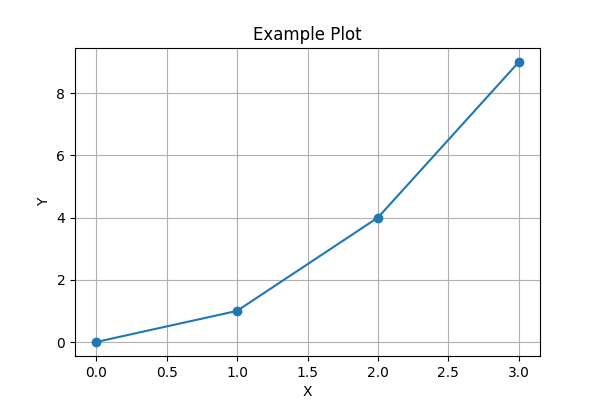

In [43]:
img_bytes = data_plotter_tool.invoke({
    "input_data": {
        "x": [0, 1, 2, 3],
        "y": [0, 1, 4, 9],
        "title": "Example Plot",
        "xlabel": "X",
        "ylabel": "Y"
    }
})

from IPython.display import Image, display
display(Image(data=img_bytes))


The above is a plotting tool.

In [33]:
!pip install pint

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 5.7 MB/s eta 0:00:00


In [34]:
from langchain_core.tools import tool
from pint import UnitRegistry

@tool
def unit_converter_tool(input_data: dict) -> str:
    """
    Converts a numerical value from one unit to another using the Pint library.

    Supports various unit types including:
    - Length (meters, feet, kilometers, miles, etc.)
    - Speed (km/h, m/s, mph, etc.)
    - Time (seconds, minutes, hours, days)
    - Weight (grams, kilograms, pounds, etc.)
    - Temperature (Celsius, Fahrenheit, Kelvin)

    Input must be a dictionary with:
    - "value": The numeric value to convert (e.g., 100)
    - "from_unit": The unit of the input value (e.g., "km/h")
    - "to_unit": The desired target unit (e.g., "m/s")

    Example input:
    {
        "value": 72,
        "from_unit": "km/h",
        "to_unit": "m/s"
    }

    Returns:
        A string describing the conversion result, e.g., "72 km/h is equal to 20.0 m/s"
    """
    ureg = UnitRegistry()
    value = input_data.get("value")
    from_unit = input_data.get("from_unit")
    to_unit = input_data.get("to_unit")

    if value is None or from_unit is None or to_unit is None:
        return "Missing input."

    try:
        quantity = value * ureg(from_unit)
        result = quantity.to(to_unit)
        return f"{value} {from_unit} = {result:.4f~P}"
    except Exception as e:
        return f"Conversion error: {e}"


In [35]:
print(unit_converter_tool.invoke({"input_data": {"value": 100, "from_unit": "km/h", "to_unit": "m/s"}}))

100 km/h = 27.7778 m/s


In [36]:
print(unit_converter_tool.invoke({"input_data": {"value": 10, "from_unit": "s", "to_unit": "hour"}}))

10 s = 0.0028 h
